In [2]:
import pandas as pd

df = pd.read_csv("D:/Task/all_tickets_processed_improved_v3.csv")
df.head()

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


In [3]:
df

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous
...,...,...
47832,git space for a project issues with adding use...,Access
47833,error sent july error hi guys can you help out...,Miscellaneous
47834,connection issues sent tuesday july connection...,Hardware
47835,error cube reports sent tuesday july error hel...,HR Support


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47837 entries, 0 to 47836
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Document     47837 non-null  object
 1   Topic_group  47837 non-null  object
dtypes: object(2)
memory usage: 747.6+ KB


In [5]:
df.shape

(47837, 2)

In [6]:
df.columns

Index(['Document', 'Topic_group'], dtype='object')

In [7]:
df = df.drop_duplicates()
df

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous
...,...,...
47832,git space for a project issues with adding use...,Access
47833,error sent july error hi guys can you help out...,Miscellaneous
47834,connection issues sent tuesday july connection...,Hardware
47835,error cube reports sent tuesday july error hel...,HR Support


In [8]:
category_counts = df['Topic_group'].value_counts()
category_counts

Topic_group
Hardware                 13617
HR Support               10915
Access                    7125
Miscellaneous             7060
Storage                   2777
Purchase                  2464
Internal Project          2119
Administrative rights     1760
Name: count, dtype: int64

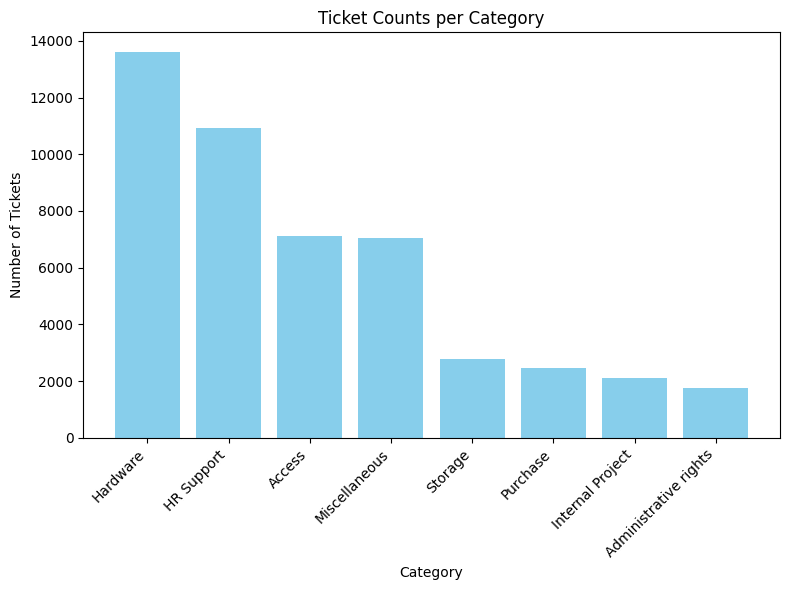

In [9]:
import matplotlib.pyplot as plt

category_counts = {
    "Hardware": 13617,
    "HR Support": 10915,
    "Access": 7125,
    "Miscellaneous": 7060,
    "Storage": 2777,
    "Purchase": 2464,
    "Internal Project": 2119,
    "Administrative rights": 1760
}

plt.figure(figsize=(8,6))
plt.bar(category_counts.keys(), category_counts.values(), color="skyblue")
plt.title("Ticket Counts per Category")
plt.xlabel("Category")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


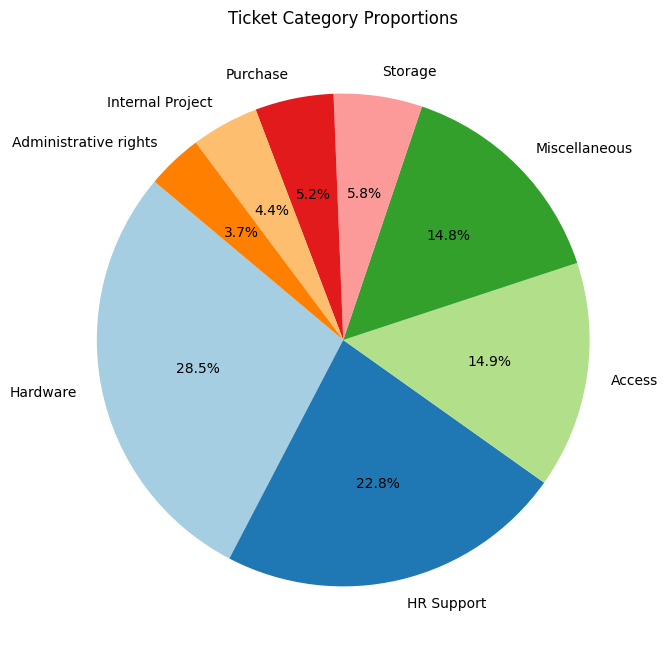

In [10]:
# Pie chart of ticket categories
plt.figure(figsize=(8,8))
plt.pie(df['Topic_group'].value_counts(),
        labels=df['Topic_group'].value_counts().index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors)
plt.title("Ticket Category Proportions")
plt.show()


In [16]:
df['contains_password'] = df['Document'].str.contains("password", case=False)
df['contains_connection'] = df['Document'].str.contains("connection", case=False)
print(df[['Document', 'contains_password', 'contains_connection']].head())

                                            Document  contains_password  \
0  connection with icon icon dear please setup ic...              False   
1  work experience user work experience user hi w...              False   
2  requesting for meeting requesting meeting hi p...              False   
3  reset passwords for external accounts re expir...               True   
4  mail verification warning hi has got attached ...              False   

   contains_connection  
0                 True  
1                False  
2                False  
3                False  
4                False  


In [17]:
urgent_words = ["immediately", "urgent", "asap", "critical", "not working", "error"]

df['contains_urgency'] = df['Document'].str.contains('|'.join(urgent_words), case=False)
df


,Document,Topic_group,contains_password,contains_connection,contains_urgency
0,connection with icon icon dear please setup ic...,Hardware,False,True,False
1,work experience user work experience user hi w...,Access,False,False,False
2,requesting for meeting requesting meeting hi p...,Hardware,False,False,False
3,reset passwords for external accounts re expir...,Access,True,False,False
4,mail verification warning hi has got attached ...,Miscellaneous,False,False,False
...,...,...,...,...,...
47832,git space for a project issues with adding use...,Access,False,False,False
47833,error sent july error hi guys can you help out...,Miscellaneous,False,False,True
47834,connection issues sent tuesday july connection...,Hardware,False,True,False
47835,error cube reports sent tuesday july error hel...,HR Support,False,False,True
